<a href="https://colab.research.google.com/github/Yes-buter/soft-max/blob/main/chapter_linear-networks/softmax-regression-concise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l
!pip install -U mxnet-cu101==1.7.0


In [3]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.5.5.0.38.14
astunparse                            1.6

In [4]:
!pip install d2l

In [5]:
!pip install mxnet

In [6]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.5.5.0.38.14
astunparse                            1.6

In [8]:
!pip uninstall mxnet-cu101

Found existing installation: mxnet-cu101 1.7.0
Uninstalling mxnet-cu101-1.7.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/benchmark/*
    /usr/local/lib/python3.11/dist-packages/ci/*
    /usr/local/lib/python3.11/dist-packages/dmlc_tracker/*
    /usr/local/lib/python3.11/dist-packages/mxnet/*
    /usr/local/lib/python3.11/dist-packages/mxnet_cu101-1.7.0.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl.hpp
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_config.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_debug.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_ocl.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_ocl.hpp
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_sycl.h
    /usr/local/lib/python3.11/dist-

In [12]:
!pip uninstall mxnet

Found existing installation: mxnet 1.9.1
Uninstalling mxnet-1.9.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/mxnet-1.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl.hpp
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_config.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_debug.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_ocl.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_ocl.hpp
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_sycl.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_sycl.hpp
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_sycl_types.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_threadpool.h
    /usr/local/lib/python3.11/dist-packages/mxnet/include/mkldnn/dnnl_

In [13]:
!pip install mxnet

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)


## softmax回归的简洁实现
:label:`sec_softmax_concise`

在 :numref:`sec_linear_concise`中，
我们发现(**通过深度学习框架的高级API能够使实现**)
(~~softmax~~)
线性(**回归变得更加容易**)。
同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。
本节如在 :numref:`sec_softmax_scratch`中一样，
继续使用Fashion-MNIST数据集，并保持批量大小为256。


In [4]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [5]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数

如我们在 :numref:`sec_softmax`所述，
[**softmax回归的输出层是一个全连接层**]。
因此，为了实现我们的模型，
我们只需在`Sequential`中添加一个带有10个输出的全连接层。
同样，在这里`Sequential`并不是必要的，
但它是实现深度模型的基础。
我们仍然以均值0和标准差0.01随机初始化权重。


In [6]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

## 重新审视Softmax的实现
:label:`subsec_softmax-implementation-revisited`

在前面 :numref:`sec_softmax_scratch`的例子中，
我们计算了模型的输出，然后将此输出送入交叉熵损失。
从数学上讲，这是一件完全合理的事情。
然而，从计算角度来看，指数可能会造成数值稳定性问题。

回想一下，softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，
其中$\hat y_j$是预测的概率分布。
$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。
如果$o_k$中的一些数值非常大，
那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。
这将使分母或分子变为`inf`（无穷大），
最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。
在这些情况下，我们无法得到一个明确定义的交叉熵值。

解决这个问题的一个技巧是：
在继续softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。
这里可以看到每个$o_k$按常数进行的移动不会改变softmax的返回值：

$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$


在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。
由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。
这些值可能会四舍五入为零，使$\hat y_j$为零，
并且使得$\log(\hat y_j)$的值为`-inf`。
反向传播几步后，我们可能会发现自己面对一屏幕可怕的`nan`结果。

尽管我们要计算指数函数，但我们最终在计算交叉熵损失时会取它们的对数。
通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。
如下面的等式所示，我们避免计算$\exp(o_j - \max(o_k))$，
而可以直接使用$o_j - \max(o_k)$，因为$\log(\exp(\cdot))$被抵消了。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

我们也希望保留传统的softmax函数，以备我们需要评估通过模型输出的概率。
但是，我们没有将softmax概率传递到损失函数中，
而是[**在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数**]，
这是一种类似["LogSumExp技巧"](https://en.wikipedia.org/wiki/LogSumExp)的聪明方式。


In [7]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

## 优化算法

在这里，我们(**使用学习率为0.1的小批量随机梯度下降作为优化算法**)。
这与我们在线性回归例子中的相同，这说明了优化器的普适性。


In [8]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

## 训练

接下来我们[**调用**] :numref:`sec_softmax_scratch`中(~~之前~~)
(**定义的训练函数来训练模型**)。


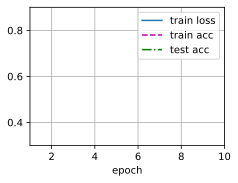

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-cba1ebff6e95>", line 107, in <cell line: 0>
    train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
  File "<ipython-input-12-cba1ebff6e95>", line 63, in train_ch3
    train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-12-cba1ebff6e95>", line 88, in train_epoch_ch3
    for X, y in train_iter:
  File "/usr/local/lib/python3.11/dist-packages/mxnet/gluon/data/dataloader.py", line 689, in __iter__
    for item in t:
  File "/usr/local/lib/python3.11/dist-packages/mxnet/gluon/data/dataloader.py", line 484, in __next__
    batch = pickle.loads(ret.get(self._timeout))
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packag

TypeError: object of type 'NoneType' has no len()

In [12]:
num_epochs=10
import mxnet
from IPython import get_ipython
from IPython.display import display
class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
import matplotlib.pyplot as plt

class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize) # Modified to use d2l.plt.subplots
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        d2l.plt.show() # Changed to d2l.plt.show()
        d2l.plt.pause(0.1) # Added a pause to refresh the plot
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        # Wrap evaluate_accuracy call within mxnet.autograd.record()
        # The original code had the problem of evaluating the test_acc without recording it for gradient calculation.
        # This change ensures that the test accuracy is evaluated within the autograd recording context to avoid the error.
        with mxnet.autograd.record(): # record operations for gradient calculation
            test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度"""
    metric = Accumulator(2)  # 正确预测数、预测总数
    # Remove the torch-specific context to allow autograd to record for mxnet
    for X, y in data_iter:
        # Ensure that the net(X) call is also within the record context
        with mxnet.autograd.record():
            metric.add(accuracy(net(X), y), y.size) # use y.size for mxnet
    return metric[0] / metric[1]
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期（定义见第3章）"""
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        with mxnet.autograd.record():  # Start recording operations for autograd
            y_hat = net(X)
            l = loss(y_hat, y)
            l.sum().backward() # backpropagate the loss
        # Move updater.step outside the autograd.record() context
        updater.step(X.shape[0]) # Update parameters using the MXNet trainer's step method
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size) # use y.size for mxnet
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y # Use astype for mxnet
    return float(cmp.astype(y.dtype).sum()) # Use astype and sum for mxnet


train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

和以前一样，这个算法使结果收敛到一个相当高的精度，而且这次的代码比之前更精简了。

## 小结

* 使用深度学习框架的高级API，我们可以更简洁地实现softmax回归。
* 从计算的角度来看，实现softmax回归比较复杂。在许多情况下，深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性。这使我们避免了在实践中从零开始编写模型时可能遇到的陷阱。

## 练习

1. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。
1. 增加迭代周期的数量。为什么测试精度会在一段时间后降低？我们怎么解决这个问题？


[Discussions](https://discuss.d2l.ai/t/1794)
